<a href="https://colab.research.google.com/github/Gouri-19/Phishing-Websites-Detection/blob/main/ISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing website detection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files  
uploaded = files.upload()


Saving UCI_1.csv to UCI_1.csv


In [ ]:
df=pd.read_csv('UCI_1.csv')

## **EDA and Pre-Processing**

In [ ]:
df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
print(len(df[df.Result==1]))
print(len(df[df.Result==-1]))

6157
4898


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [ ]:
df.isnull().sum()

id                             0
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [ ]:
df.rename(columns={'Result': 'Class'}, inplace=True)

df['Class'] = df['Class'].map({-1:0, 1:1})
df['Class'].unique()

array([0, 1])

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
y_train

,Class
3361,1
6009,1
9318,1
424,1
660,0
...,...
6359,1
2186,1
697,1
6549,1


# **Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,{
      # 'bootstrap': [True, False],
      # 'max_depth': [10, 20, 30, 40],
      # 'max_features': ['auto', 'sqrt'],
      # 'min_samples_leaf': [1, 2, 4],
      # 'min_samples_split': [2, 5, 10],
      'n_estimators': [200,300, 400,500, 600, 800],
}, cv=5, return_train_score = False)

clf.fit(X_train, y_train.values.ravel())
res=pd.DataFrame(clf.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.063950,0.009443,0.083802,0.001827,200,{'n_estimators': 200},0.963821,0.971170,0.963821,0.976258,0.961538,0.967322,0.005525,3
1,1.601261,0.011089,0.124811,0.002031,300,{'n_estimators': 300},0.963821,0.973431,0.964952,0.976258,0.959276,0.967548,0.006317,1
2,2.133989,0.007711,0.165468,0.002522,400,{'n_estimators': 400},0.962691,0.973431,0.963821,0.975692,0.959842,0.967096,0.006274,5
3,2.710056,0.036078,0.212472,0.004396,500,{'n_estimators': 500},0.962125,0.971735,0.966083,0.977388,0.958710,0.967208,0.006685,4
4,3.248474,0.014033,0.249023,0.003462,600,{'n_estimators': 600},0.964387,0.972866,0.964387,0.976823,0.959276,0.967548,0.006367,1
5,4.321914,0.022793,0.338107,0.012507,800,{'n_estimators': 800},0.962691,0.972301,0.965517,0.976823,0.958145,0.967095,0.006689,6


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_best = RandomForestClassifier(n_estimators=300)
rfc_best.fit(X_train,y_train.values.ravel())
rfc_best.score(X_test,y_test)

0.9656264133876075

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = "ovr", max_iter = 4000, penalty = "l2")
clf2 = GridSearchCV(lr,{
    'C':[0.1,1,10],
    'tol':[0.1,1,10],
}, return_train_score = False)

clf2.fit(X_train, y_train.values.ravel())
res2=pd.DataFrame(clf2.cv_results_)
res2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.340382,0.147022,0.003319,0.000052,0.1,0.1,"{'C': 0.1, 'tol': 0.1}",0.927077,0.931600,0.923120,0.941775,0.909502,0.926615,0.010582,1
1,0.344806,0.143476,0.003415,0.000104,0.1,1,"{'C': 0.1, 'tol': 1}",0.927077,0.931600,0.923120,0.941775,0.909502,0.926615,0.010582,1
2,0.341060,0.130391,0.003405,0.000108,0.1,10,"{'C': 0.1, 'tol': 10}",0.927077,0.931600,0.923120,0.941775,0.909502,0.926615,0.010582,1
3,0.427926,0.086172,0.003380,0.000051,1,0.1,"{'C': 1, 'tol': 0.1}",0.926512,0.929339,0.918598,0.939514,0.915724,0.925937,0.008419,4
4,0.431364,0.088071,0.003541,0.000372,1,1,"{'C': 1, 'tol': 1}",0.926512,0.929339,0.918598,0.939514,0.915724,0.925937,0.008419,4
5,0.436673,0.096581,0.003352,0.000067,1,10,"{'C': 1, 'tol': 10}",0.926512,0.929339,0.918598,0.939514,0.915724,0.925937,0.008419,4
6,0.365915,0.156989,0.005147,0.003414,10,0.1,"{'C': 10, 'tol': 0.1}",0.928208,0.929904,0.918033,0.938949,0.911765,0.925372,0.009507,7
7,0.363500,0.164511,0.003696,0.000287,10,1,"{'C': 10, 'tol': 1}",0.928208,0.929904,0.918033,0.938949,0.911765,0.925372,0.009507,7
8,0.369082,0.157257,0.003494,0.000212,10,10,"{'C': 10, 'tol': 10}",0.928208,0.929904,0.918033,0.938949,0.911765,0.925372,0.009507,7


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_best = LogisticRegression(multi_class = "ovr", max_iter = 4000, penalty = "l2",C=0.1,tol=1)
lr_best.fit(X_train,y_train.values.ravel())
lr_best.score(X_test,y_test)

0.9235639981908639

## **Evaluation**

In [ ]:
from sklearn import metrics

y_pred = rfc_best.predict(X_test)


In [ ]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1010
           1       0.98      0.96      0.97      1201

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 983   47]
 [  27 1154]]


Text(91.68, 0.5, 'predicted label')

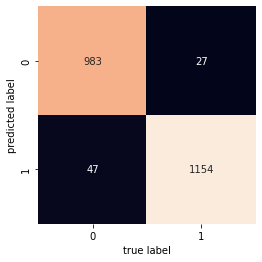

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
y_pred2 = lr_best.predict(X_test)
y_pred2

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
print(metrics.classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       985
           1       0.95      0.91      0.93      1226

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



[[ 923  107]
 [  62 1119]]


Text(91.68, 0.5, 'predicted label')

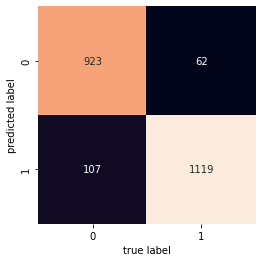

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

sns.heatmap(cm2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## **New model - Neural Networks**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

model=Sequential()

model.add(Dense(units=60,activation='relu',input_dim=31))
model.add(Dense(units=24,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 60)                1920      
                                                                 
 dense_5 (Dense)             (None, 24)                1464      
                                                                 
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 3,697
Trainable params: 3,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
RNN_Model=model.fit(X_train,y_train, batch_size=10 , epochs=100, verbose=1)

Epoch 1/100
885/885 [==============================] - 2s 2ms/step - loss: 4.9071 - accuracy: 0.6017
Epoch 2/100
885/885 [==============================] - 2s 2ms/step - loss: 2.1481 - accuracy: 0.7203
Epoch 3/100
885/885 [==============================] - 2s 2ms/step - loss: 1.3771 - accuracy: 0.7786
Epoch 4/100
885/885 [==============================] - 2s 2ms/step - loss: 1.1685 - accuracy: 0.7957
Epoch 5/100
885/885 [==============================] - 2s 2ms/step - loss: 1.2857 - accuracy: 0.7968
Epoch 6/100
885/885 [==============================] - 2s 2ms/step - loss: 1.0931 - accuracy: 0.8151
Epoch 7/100
885/885 [==============================] - 2s 2ms/step - loss: 0.5206 - accuracy: 0.8606
Epoch 8/100
885/885 [==============================] - 2s 2ms/step - loss: 0.4802 - accuracy: 0.8600
Epoch 9/100
885/885 [==============================] - 3s 4ms/step - loss: 0.6254 - accuracy: 0.8467
Epoch 10/100
885/885 [==============================] - 3s 3ms/step - loss: 0.3927 - accura

In [ ]:
y_test_rnn = model.predict(X_test)
y_train_rnn = model.predict(X_train)

In [ ]:
scores = model.evaluate(X_test, y_test)

70/70 [==============================] - 0s 1ms/step - loss: 0.1930 - accuracy: 0.9231


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = np.round(model.predict(X_test),0)

print(confusion_matrix(y_test, preds))

print(classification_report(y_test, preds))

[[ 936   94]
 [  76 1105]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1030
           1       0.92      0.94      0.93      1181

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211

